In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, adam,RMSprop
import matplotlib.pyplot as plt

In [3]:
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS=32

BATCH_SIZE=128
NB_EPOCH=20
NB_CLASSES=10
VERBOSE=1
VALIDATION_SPLIT=0.2
OPTIM=RMSprop()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train.shape", X_train.shape)


170500096/170498071 [==============================] - 2460s 14us/step
X_train.shape (50000, 32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]  Train samples
[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111 

In [4]:
print(X_train.shape[0]," Train samples")
print(X_test.shape[0]," Test samples")

50000  Train samples
10000  Test samples


In [5]:
import pickle

pickle_out=open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out=open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out=open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out=open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [8]:
Y_train=np_utils.to_categorical(y_train, NB_CLASSES)
Y_test=np_utils.to_categorical(y_test, NB_CLASSES)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255
X_test /= 255

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [38]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_9 (Activation)    (None, 512)              

In [39]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/20
313/313 [==============================] - 41s 130ms/step - loss: 1.6068 - accuracy: 0.4220 - val_loss: 1.3227 - val_accuracy: 0.5290
Epoch 2/20
313/313 [==============================] - 40s 128ms/step - loss: 1.2931 - accuracy: 0.5397 - val_loss: 1.1844 - val_accuracy: 0.5875
Epoch 3/20
313/313 [==============================] - 40s 128ms/step - loss: 1.1698 - accuracy: 0.5850 - val_loss: 1.1326 - val_accuracy: 0.6051
Epoch 4/20
313/313 [==============================] - 39s 123ms/step - loss: 1.0868 - accuracy: 0.6144 - val_loss: 1.1076 - val_accuracy: 0.6212
Epoch 5/20
313/313 [==============================] - 39s 123ms/step - loss: 1.0278 - accuracy: 0.6359 - val_loss: 1.0071 - val_accuracy: 0.6484
Epoch 6/20
313/313 [==============================] - 40s 127ms/step - loss: 0.9645 - accuracy: 0.6572 - val_loss: 0.9942 - val_accuracy: 0.6517
Epoch 7/20
313/313 [==============================] - 40s 128ms/step - loss: 0.9175 - accuracy: 0.6747 - val_loss: 0.9605 - val_ac

In [41]:
score=model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

79/79 [==============================] - 2s 31ms/step - loss: 0.9587 - accuracy: 0.6882 0s - loss: 0.9522 - accu
Test Score: 0.9586958289146423
Test Accuracy: 0.6881999969482422


In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_9 (Activation)    (None, 512)              

In [43]:
model.save("img_classifier(ver-2).h5")

In [29]:
import scipy.misc
import cv2
# img_names=["    ", "    "]

In [69]:
import numpy as np

imgs=cv2.imread("ship.jpg")
imgs=cv2.resize(imgs, (32,32))


model.predict_classes(imgs.reshape(1,32,32,3))



array([0], dtype=int64)

In [70]:
model.predict_proba(imgs.reshape(1,32,32,3))

array([[1.0000000e+00, 0.0000000e+00, 8.0156835e-26, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.4514289e-38]], dtype=float32)

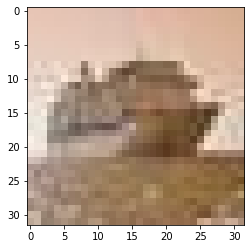

In [71]:
plt.imshow(imgs, cmap='gray')
plt.show()